In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import random
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
boston_dataset = load_boston()

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [5]:
#divide data into train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 )

In [8]:
print(y_train.shape[0])

354


In [9]:
print(x_train.shape[0])
print(type(x_train))

354
<class 'numpy.ndarray'>


In [10]:
scaler = preprocessing.StandardScaler()
X_train_new = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [354]:
clf = SGDRegressor()
clf.fit(X_train_new, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))

28.96431970466799


In [735]:
clf.coef_

array([-0.41784587,  0.27285295, -0.80894236,  1.14640158, -0.89668609,
        3.03082375, -0.45145894, -2.15625115,  0.80500863, -0.38842978,
       -1.57151116,  0.45537781, -2.91910694])

In [12]:
def calculate_mse(w,b,data,label):
    sqr_loss =  [(label[idx] - (np.dot(w.T,x) + b))**2 for idx,x in enumerate(data)]
    return sum(sqr_loss)/len(label)

In [724]:
def stochastic_gradient_descent():
    train_loss = []
    test_loss = []
    learning_rate = 0.001
    epochs = 500
#     initial_w = np.random.rand(13)
    mu,sigma = 0,0.1
    initial_w = np.random.normal(mu,sigma,13)
    initial_b = random.random()
    next_w = next_b = 0
    for epoch in range(epochs):
        random_array = np.random.randint(1, X_train_new.shape[0])
        random_x_sample = X_train_new[:random_array]
        random_y_sample = y_train[:random_array]

        for index, each_x in enumerate(random_x_sample):
            next_w += -2 * each_x * (random_y_sample[index] - np.dot(initial_w.T, each_x))
            next_b += -2 * (random_y_sample[index] - np.dot(initial_w.T, each_x))
        initial_w = initial_w - (learning_rate * next_w)
        initial_b = initial_b - (learning_rate * next_b)
        train_loss.append(calculate_mse(initial_w, initial_b, random_x_sample, random_y_sample))
        test_loss.append(calculate_mse(initial_w, initial_b, X_test, y_test))
        if (initial_w == next_w).all():
            break
        else:
            learning_rate = learning_rate/2
        return train_loss, test_loss
#     return learning_rate, train_loss, test_loss, initial_w, initial_b

train_loss, test_loss = stochastic_gradient_descent()
train_loss

[61.61689855775707]

In [725]:
initial_w

array([ 0.79159901, -0.47746328, -1.52331342,  0.96256601, -0.64353987,
        3.25968175,  1.02868154, -1.51907067,  0.27284106, -1.50190654,
       -1.87696202,  0.01230955, -3.71570561])

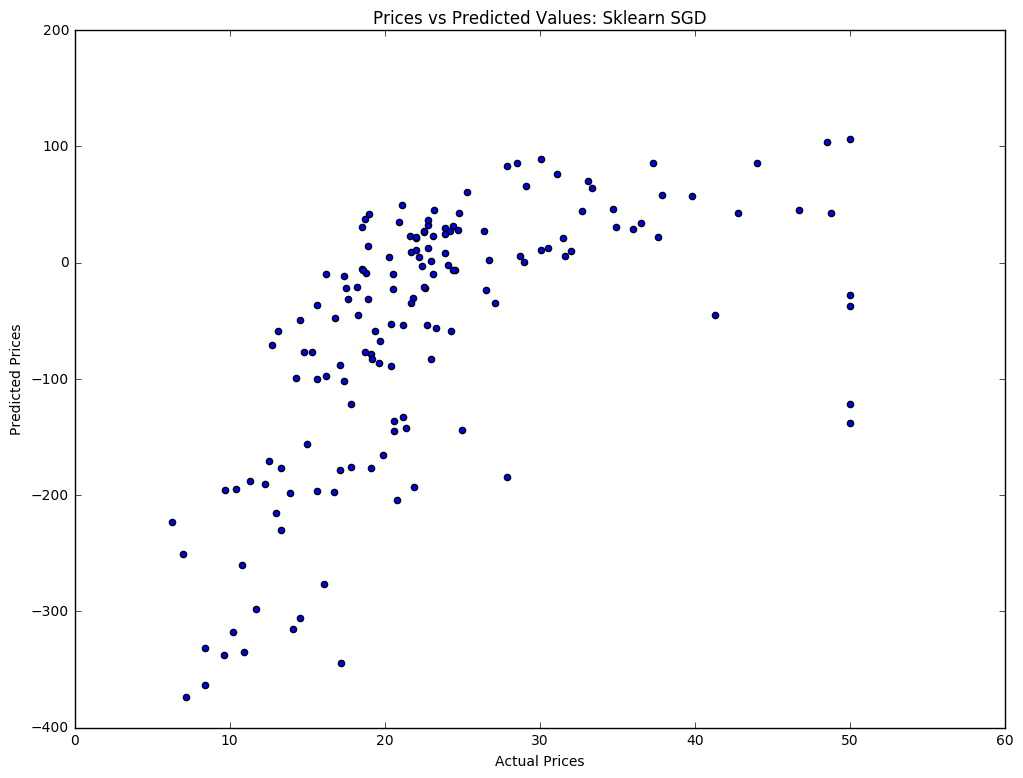

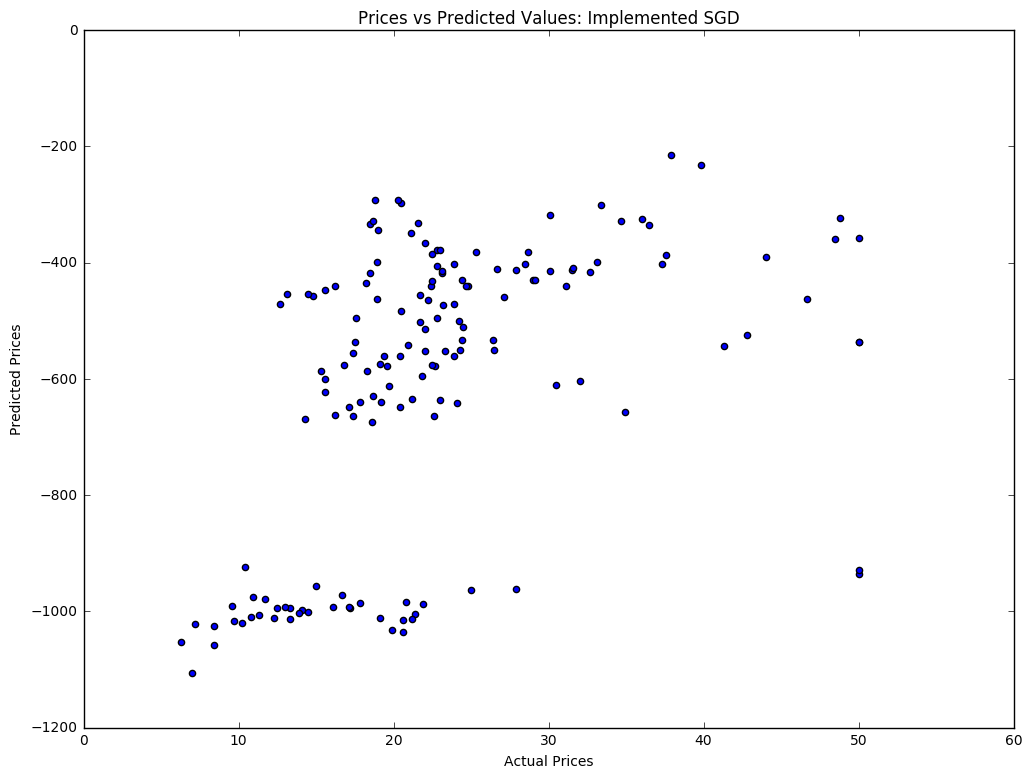

In [734]:
# Prices vs Predicted Values plot
#Sklearn SGD
plt.figure(figsize=(12, 9))
plt.scatter(y_test, clf.predict(x_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Values: Sklearn SGD")
plt.show()

#Implemented SGD
plt.figure(figsize=(12, 9))
plt.scatter([y_test], [(np.dot(x_test, initial_w) + b)])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Values: Implemented SGD")
plt.show()

Learning Rate :  3.054936363499605e-154


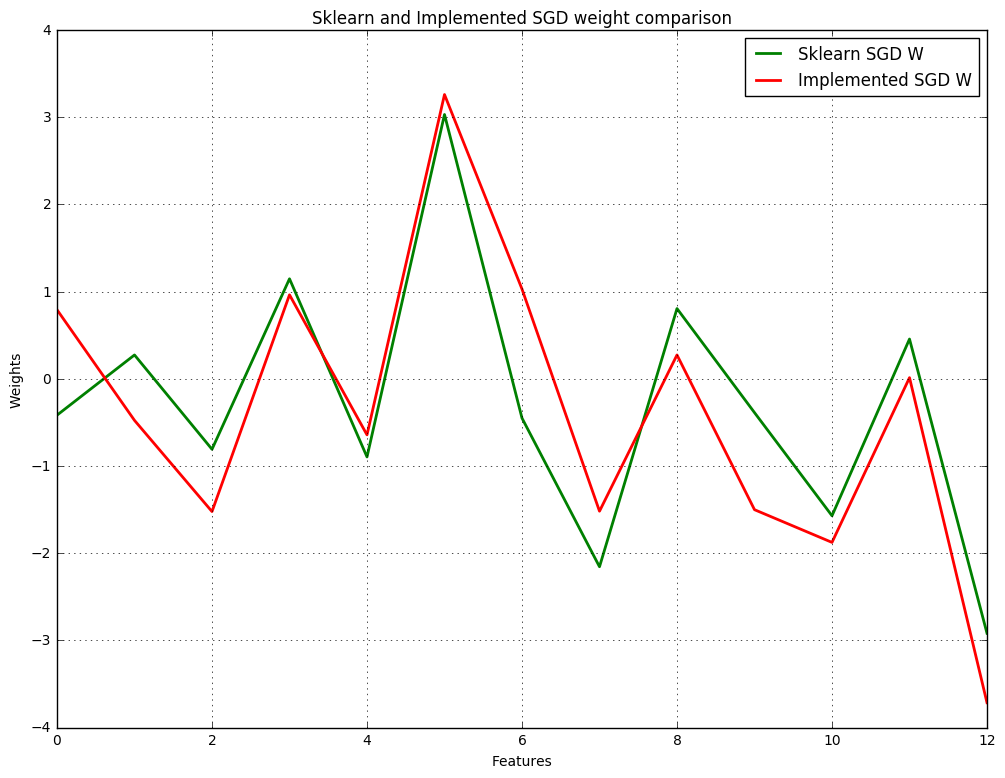

In [733]:
# Sklearn and Implemented SGD weight comparison
print("Learning Rate : ",learning_rate)
plt.figure(figsize=(12, 9))
plt.plot(range(len(w)), clf.coef_, color='green', lw=2, label='Sklearn SGD W')
plt.plot(range(len(w)), initial_w, color='red', lw=2, label='Implemented SGD W')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend(loc="upper right")
plt.title("Sklearn and Implemented SGD weight comparison")
plt.grid(True,color='black')
plt.show()

In [736]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Model","Weights", "Test Data MSE"]
pt.add_row(["Sklearn SGD", '''array([-0.41784587,  0.27285295, -0.80894236,  1.14640158, -0.89668609,
        3.03082375, -0.45145894, -2.15625115,  0.80500863, -0.38842978,
       -1.57151116,  0.45537781, -2.91910694])''' ,28.96])
pt.add_row(["Implemented SGD", '''array([ 0.79159901, -0.47746328, -1.52331342,  0.96256601, -0.64353987,
        3.25968175,  1.02868154, -1.51907067,  0.27284106, -1.50190654,
       -1.87696202,  0.01230955, -3.71570561])''', 61.61])
print(pt)

+-----------------+-------------------------------------------------------------------------+---------------+
|      Model      |                                 Weights                                 | Test Data MSE |
+-----------------+-------------------------------------------------------------------------+---------------+
|   Sklearn SGD   | array([-0.41784587,  0.27285295, -0.80894236,  1.14640158, -0.89668609, |     28.96     |
|                 |         3.03082375, -0.45145894, -2.15625115,  0.80500863, -0.38842978, |               |
|                 |                     -1.57151116,  0.45537781, -2.91910694])             |               |
| Implemented SGD | array([ 0.79159901, -0.47746328, -1.52331342,  0.96256601, -0.64353987, |     61.61     |
|                 |         3.25968175,  1.02868154, -1.51907067,  0.27284106, -1.50190654, |               |
|                 |                     -1.87696202,  0.01230955, -3.71570561])             |               |
+---------

# Procedure followed

1. Loaded the test and train datasets
2. Implemented the sklearn implementation of SGDRegressor
3. Calculated the mse using own method
4. Compared the weigths of both implementation